In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector 
db = mysql.connector.connect( host='localhost',
                            username='root',
                            password = 'manish1234',
                            database = 'ecommerce' )
cur = db.cursor()


 # List all unique cities where customers are located.

In [3]:
query = """select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head(10)


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo
7,curitiba
8,belo horizonte
9,montes claros


# Count the number of orders placed in 2017.

In [4]:
query = """SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are  ",data[0][0]


('Total orders placed in 2017 are  ', 180404)

#  Find the total sales per category.

In [5]:
query = """
SELECT upper (products.product_category) category, ROUND(SUM(payments.payment_value), 2) AS sales 
FROM products 
JOIN order_items ON products.product_id = order_items.product_id 
JOIN payments ON payments.order_id = order_items.order_id 
GROUP BY products.product_category"""

cur.execute(query)

data = cur.fetchall()

df  = pd.DataFrame(data, columns = ["category" ,"sales"])
df


,category,sales
0,PERFUMERY,13681943.82
1,FURNITURE DECORATION,38614762.58
2,TELEPHONY,13145815.37
3,BED TABLE BATH,46238949.12
4,AUTOMOTIVE,23011946.94
...,...,...
69,CDS MUSIC DVDS,32384.61
70,LA CUISINE,78665.31
71,FASHION CHILDREN'S CLOTHING,21213.09
72,PC GAMER,58709.61


# Calculate the percentage of orders that were paid in installments

In [6]:
# Count Total Orders: You can use this SQL query to get the total number of orders:
query = """SELECT COUNT(*) AS total_orders FROM orders; """
cur.execute(query)
data = cur.fetchall()
data

[(397764,)]

In [7]:
# Count Installment Orders: Use this query to find the number of orders paid in installments:
query = """SELECT COUNT(*) AS installment_orders FROM payments WHERE payment_installments > 1;
 """
cur.execute(query)
data = cur.fetchall()
data

[(154014,)]

In [8]:
# Calculate the Percentage: Finally, you can calculate the percentage of orders paid in installments using:
query = """SELECT 
    (COUNT(CASE WHEN payment_installments > 1 THEN 1 END) * 100.0 / COUNT(*)) AS percentage_installment_orders 
FROM payments;

 """
cur.execute(query)
data = cur.fetchall()
print("The percentage of orders that were paid in installments is = " ,data[0][0])

The percentage of orders that were paid in installments is =  49.41763


In [9]:
#  Explanation:
# COUNT(*) gives you the total number of orders.
#CASE WHEN counts only those orders where payments were made in installments.
# (installment orders / total orders) * 100 calculates the percentage.

# Count the number of customers from each state

In [10]:
query = """SELECT customer_state, COUNT(customer_id) 
FROM customers 
GROUP BY customer_state;
 """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head(10)


,0,1
0,SP,250476
1,SC,21822
2,MG,69810
3,PR,30270
4,RJ,77112
5,RS,32796
6,PA,5850
7,GO,12120
8,ES,12198
9,BA,20280


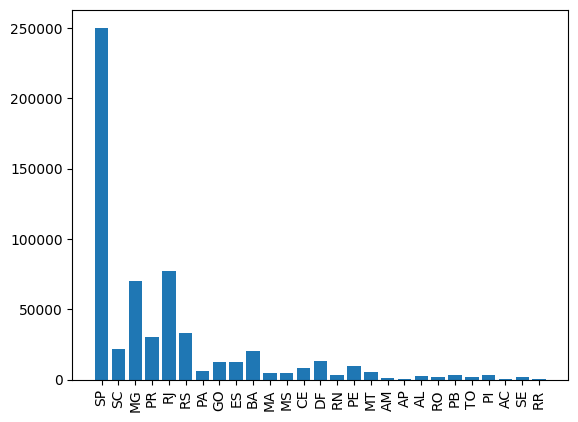

In [11]:
query = """SELECT customer_state, COUNT(customer_id) 
FROM customers 
GROUP BY customer_state;"""
cur.execute(query)
data = cur.fetchall()

# Create DataFrame with the correct column names
df = pd.DataFrame(data, columns=["state", "customers_count"])# Correct column names
plt.bar(df["state"], df["customers_count"])
plt.xticks(rotation = 90)
plt.show()                  

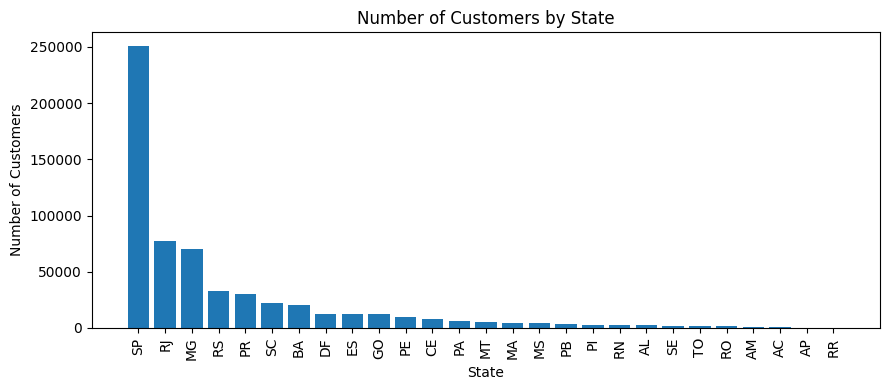

In [12]:
df = df.sort_values(by="customers_count", ascending=False)

# Plotting the bar chart
plt.figure(figsize=(9, 4))  # Optional: Adjust the figure size for better visibility
plt.bar(df["state"], df["customers_count"])
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.title("Number of Customers by State")
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [13]:
# number of satet in this data
query = """SELECT COUNT(DISTINCT customer_state) AS total_states 
FROM customers;"""

cur.execute(query)
data = cur.fetchone()  # Use fetchone() since we expect a single value

# Access the total number of states
total_states = data[0]  # The first (and only) element
print("Total unique states:", total_states)


Total unique states: 27


#  Calculate the number of orders per month in 2018.

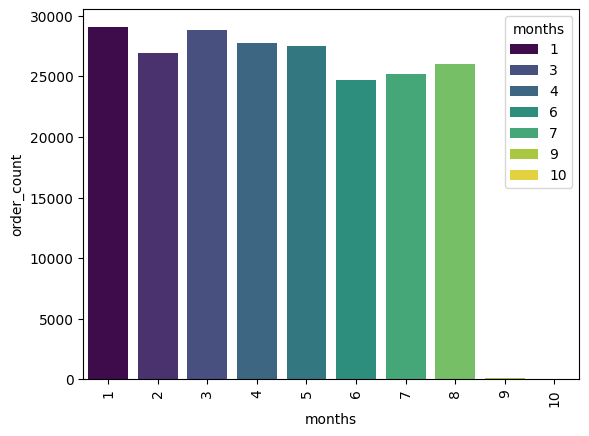

In [14]:
query = """
    SELECT 
        MONTH(order_purchase_timestamp) AS month,
        COUNT(order_id) AS order_count 
    FROM 
        orders 
    WHERE 
        YEAR(order_purchase_timestamp) = 2018 
    GROUP BY 
        MONTH(order_purchase_timestamp) 
    ORDER BY 
        MONTH(order_purchase_timestamp);
"""
cur.execute(query)

# Fetch all the results
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["months" , "order_count"])
df.head(12)
o = ['1','2','3','4','5','6','7','8','9','10']
sns.barplot(x = df["months"],y = df["order_count"],data = df , order = o , hue = df["months"], palette = "viridis")
plt.xticks (rotation= 90)
plt.show()

#  Find the average number of products per order, grouped by customer city.

In [15]:
query = """
WITH count_per_order AS (
    SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) AS oc
    FROM orders
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)
SELECT customers.customer_city, AVG(count_per_order.oc) AS average_items
FROM customers
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city  ;
"""

# Query execute karein
cur.execute(query)

# Results ko fetch karein
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer_city" , " avarage product/order"])
df.head(11)

,customer_city,avarage product/order
0,treze tilias,15.2727
1,indaial,13.3846
2,sao jose dos campos,13.6618
3,sao paulo,13.8746
4,porto alegre,14.0991
5,santos,13.9377
6,sao francisco do sul,14.8235
7,sao vicente,13.0909
8,joinville,13.2319
9,sao vendelino,12.0000


# Calculate the percentage of total revenue contributed by each product category.

In [16]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

,Category,percentage distribution
0,BED TABLE BATH,96.28
1,HEALTH BEAUTY,93.18
2,COMPUTER ACCESSORIES,89.13
3,FURNITURE DECORATION,80.40
4,WATCHES PRESENT,80.35


# Identify the correlation between product price and the number of times a product has been purchased.

In [19]:
cur = db.cursor()
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157556


# Calculate the total revenue generated by each seller, and rank them by revenue.

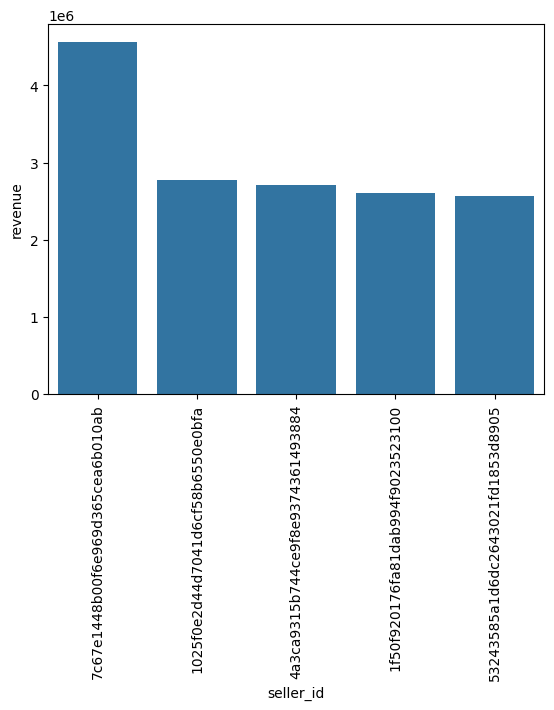

In [22]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [23]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
1246627,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246628,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246629,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246630,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate the cumulative sales per month for each year.

In [24]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,3026.88,3.026880e+03
1,2016,10,709085.76,7.121126e+05
2,2016,12,235.44,7.123481e+05
3,2017,1,1661856.48,2.374205e+06
4,2017,2,3502896.11,5.877101e+06
5,2017,3,5398363.19,1.127546e+07
6,2017,4,5013456.35,1.628892e+07
7,2017,5,7115025.84,2.340395e+07
8,2017,6,6135316.56,2.953926e+07
9,2017,7,7108595.03,3.664786e+07


# Calculate the year-over-year growth rate of total sales.

In [26]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703759
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [27]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data


[(None,)]

# Identify the top 3 customers who spent the most money in each year.


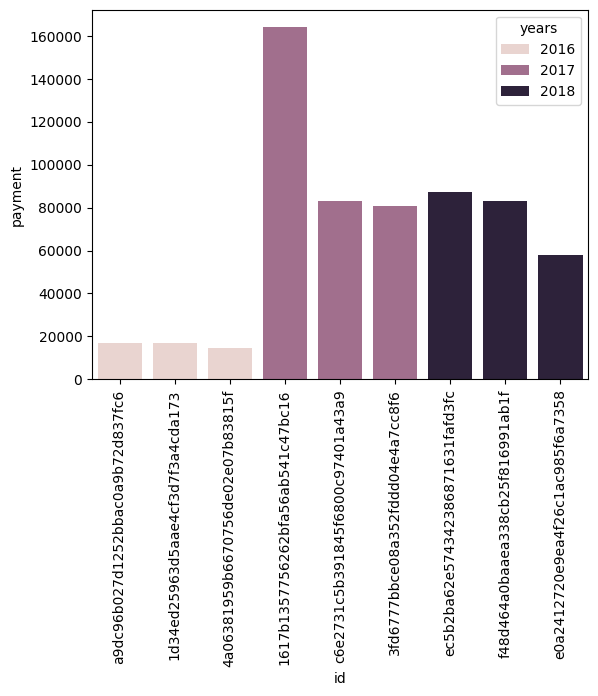

In [28]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()